Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

Loading Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Eugene Pinsky/Final Project/Structured/Star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


##Data Exploration

Getting overview of dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Percentage distribution of each class.

In [5]:
#percentage of instances in each class
(df["class"].value_counts()/len(df) * 100).round() 

GALAXY    59.0
STAR      22.0
QSO       19.0
Name: class, dtype: float64

In [6]:
#data records from index 20 to 30 before encoding class labels. 
df.iloc[20:30]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
20,1.237652e+18,171.975425,67.747450,22.13367,20.84772,18.96537,18.31696,17.98124,1412,301,5,136,5.529741e+17,GALAXY,0.374756,491,51942,572
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,STAR,-0.000120,7316,56710,756
22,1.237658e+18,145.273037,46.960134,25.44243,20.77028,19.66170,19.08481,18.83176,2821,301,2,30,9.390322e+17,GALAXY,0.662310,834,52316,115
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,QSO,2.075680,7308,56709,596
24,1.237662e+18,241.426267,27.224695,18.88323,17.54229,17.01789,16.75376,16.72259,3927,301,4,94,1.568480e+18,GALAXY,0.032081,1393,52824,368
25,1.237658e+18,132.922468,4.521865,21.26110,20.50495,18.36379,23.17828,17.96264,3015,301,3,126,1.339873e+18,GALAXY,0.250956,1190,52670,190
26,1.237658e+18,143.288018,5.552052,25.98497,21.31456,19.61107,18.83178,18.27728,3015,301,3,195,5.484305e+18,GALAXY,0.461278,4871,55928,170
27,1.237658e+18,140.600038,5.265758,25.46577,22.40650,21.43408,20.26256,19.98775,3015,301,3,177,5.483188e+18,GALAXY,0.611062,4870,55923,203
28,1.237663e+18,333.311511,-0.376123,20.53324,18.84066,18.05369,17.60397,17.29030,4192,301,3,177,1.164231e+18,GALAXY,0.091085,1034,52813,184
29,1.237663e+18,337.093435,-0.311773,20.15491,18.37295,17.31276,16.82294,16.44342,4192,301,3,203,4.234019e+17,GALAXY,0.148228,376,52143,231


Encoding categorical values of class labels to numeric.

In [7]:
#encoding Galaxy, Quasar (QSO) and Star to 0,1 and 2 respectively.
df["class"].replace(["GALAXY","QSO","STAR"],[0,1,2],inplace=True)

#viewing class labels in column class after encoding
df.iloc[20:30]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
20,1.237652e+18,171.975425,67.747450,22.13367,20.84772,18.96537,18.31696,17.98124,1412,301,5,136,5.529741e+17,0,0.374756,491,51942,572
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,2821,301,2,28,8.237292e+18,2,-0.000120,7316,56710,756
22,1.237658e+18,145.273037,46.960134,25.44243,20.77028,19.66170,19.08481,18.83176,2821,301,2,30,9.390322e+17,0,0.662310,834,52316,115
23,1.237658e+18,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2821,301,2,33,8.228240e+18,1,2.075680,7308,56709,596
24,1.237662e+18,241.426267,27.224695,18.88323,17.54229,17.01789,16.75376,16.72259,3927,301,4,94,1.568480e+18,0,0.032081,1393,52824,368
25,1.237658e+18,132.922468,4.521865,21.26110,20.50495,18.36379,23.17828,17.96264,3015,301,3,126,1.339873e+18,0,0.250956,1190,52670,190
26,1.237658e+18,143.288018,5.552052,25.98497,21.31456,19.61107,18.83178,18.27728,3015,301,3,195,5.484305e+18,0,0.461278,4871,55928,170
27,1.237658e+18,140.600038,5.265758,25.46577,22.40650,21.43408,20.26256,19.98775,3015,301,3,177,5.483188e+18,0,0.611062,4870,55923,203
28,1.237663e+18,333.311511,-0.376123,20.53324,18.84066,18.05369,17.60397,17.29030,4192,301,3,177,1.164231e+18,0,0.091085,1034,52813,184
29,1.237663e+18,337.093435,-0.311773,20.15491,18.37295,17.31276,16.82294,16.44342,4192,301,3,203,4.234019e+17,0,0.148228,376,52143,231


Plot to view disproportionate distribution of class records.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


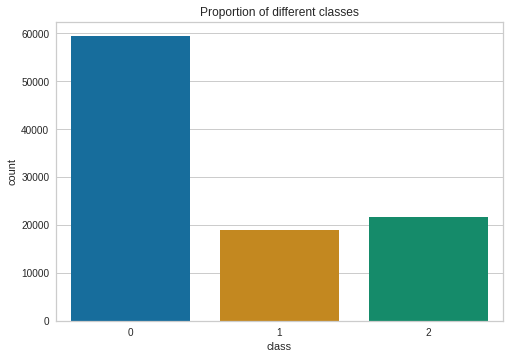

In [8]:
ax = sns.countplot(df["class"],palette="colorblind")
plt.title("Proportion of different classes")
plt.show()

Viewing correlation between different columns of dataset.

In [9]:
corr_mat = df.corr()
corr_mat["class"].sort_values()

r             -0.076766
redshift      -0.054239
fiber_ID      -0.041586
run_ID        -0.036014
obj_ID        -0.036012
field_ID      -0.034833
u             -0.024645
g             -0.020066
alpha         -0.011756
spec_obj_ID   -0.010060
plate         -0.010060
z             -0.001614
MJD           -0.000405
delta          0.014452
i              0.015028
cam_col        0.023138
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Visualizing data using boxplot.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


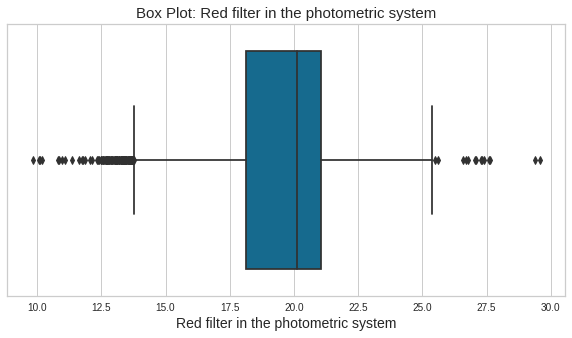

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


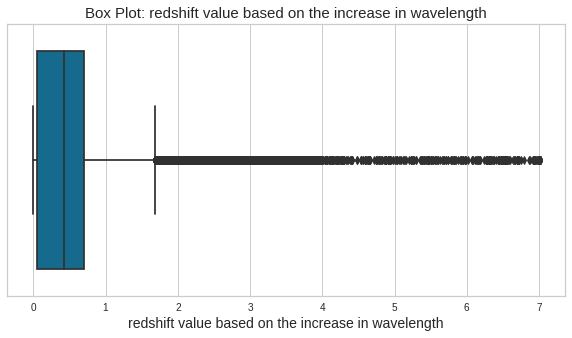

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


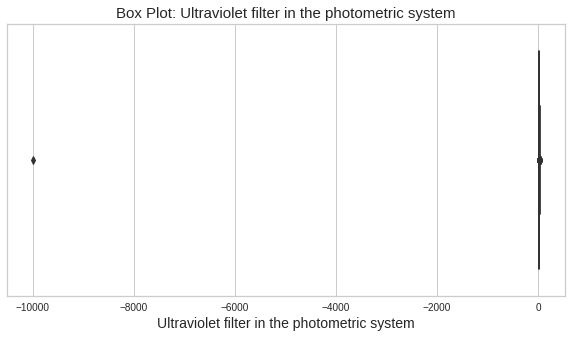

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


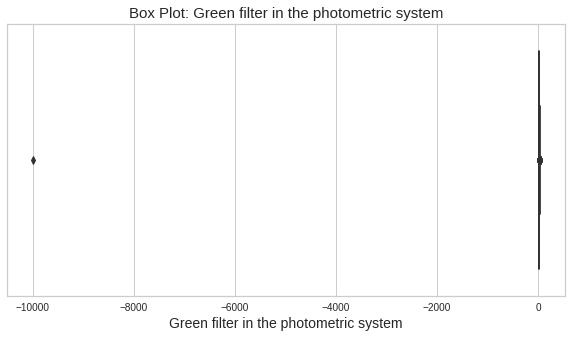

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


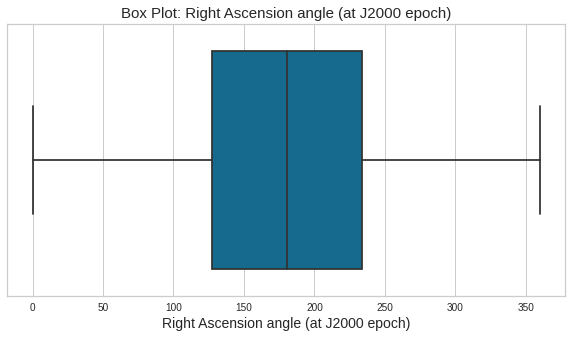

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


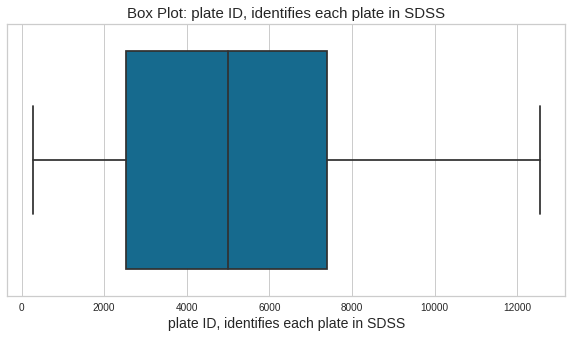

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


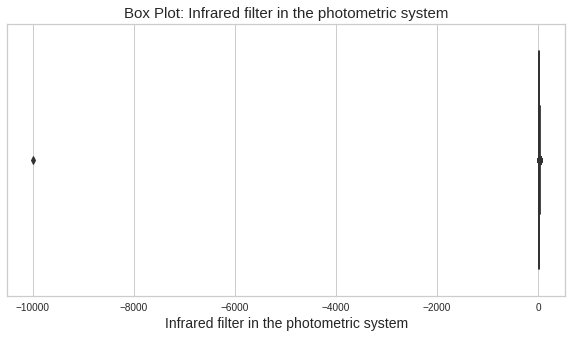

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


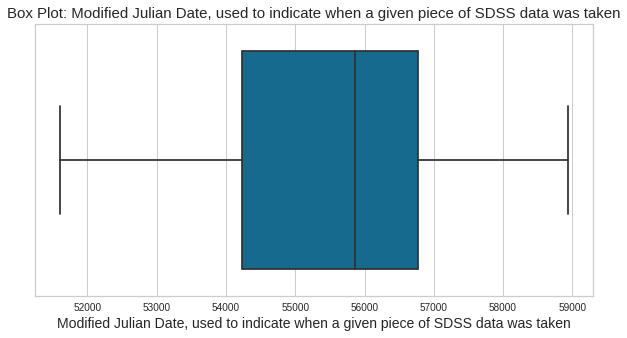

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


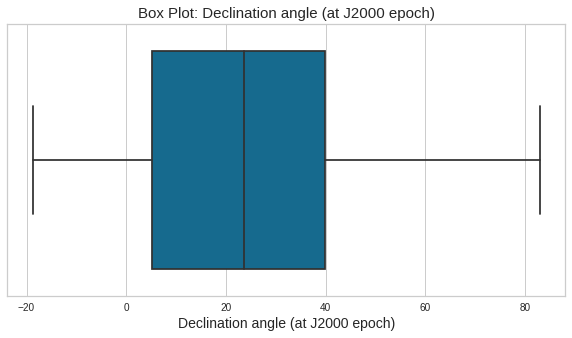

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


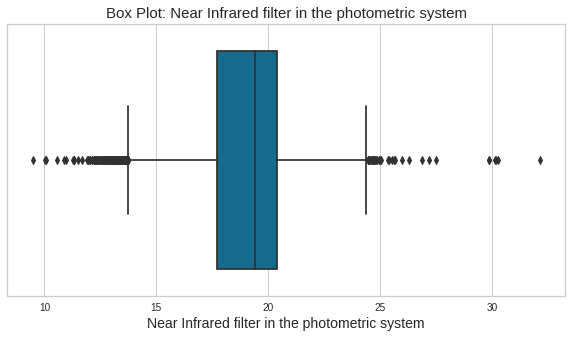

In [10]:
featureSet = ["r","redshift","u","g","alpha","plate","z","MJD","delta","i"]

labelSet = ["Red filter in the photometric system",
            "redshift value based on the increase in wavelength",
            "Ultraviolet filter in the photometric system",
            "Green filter in the photometric system",
            "Right Ascension angle (at J2000 epoch)",
            "plate ID, identifies each plate in SDSS",
            "Infrared filter in the photometric system",
            "Modified Julian Date, used to indicate when a given piece of SDSS data was taken",
            "Declination angle (at J2000 epoch)",
            "Near Infrared filter in the photometric system"]

for feature,label in zip(featureSet,labelSet):
  
  fig = plt.figure(figsize=(10,5))
  sns.boxplot(df[feature])
  plt.title("Box Plot: " + label ,fontsize=15)
  plt.xlabel(label,fontsize=14)
  plt.show()

Viewing distribution for each feature column using histogram.

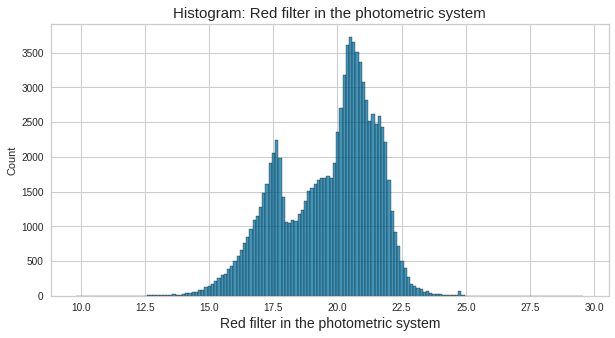

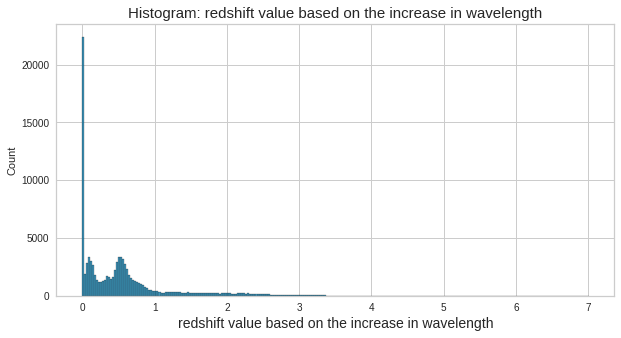

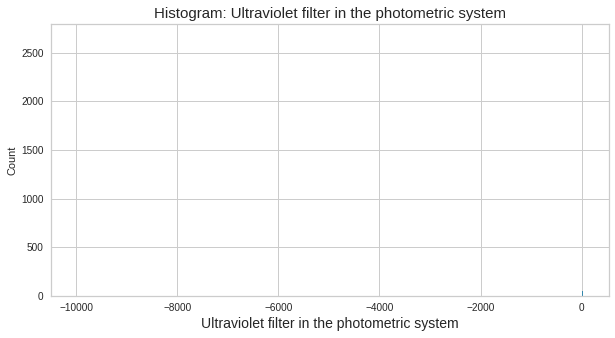

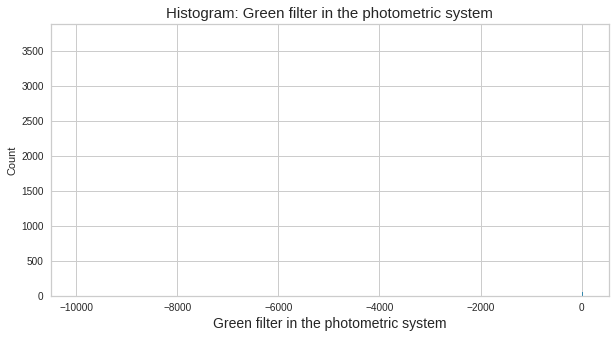

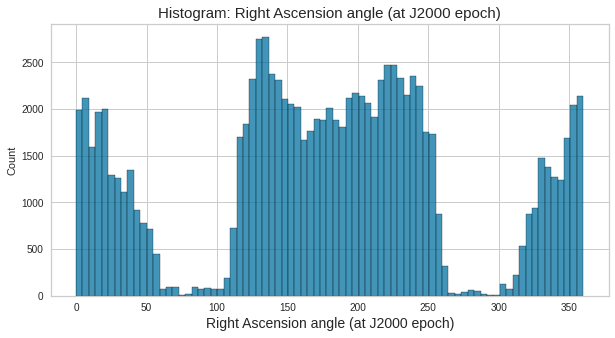

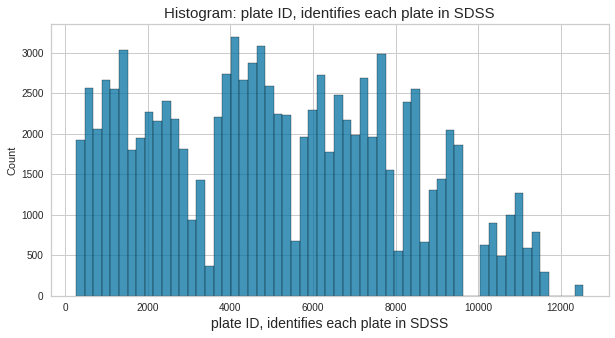

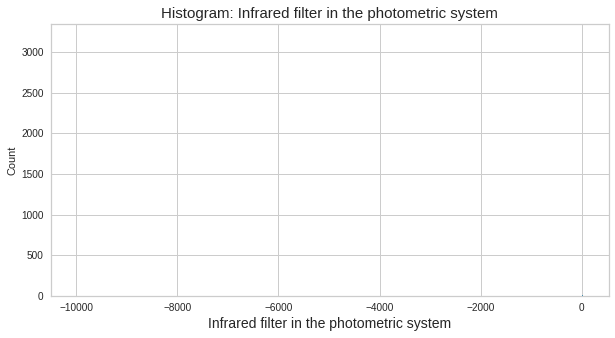

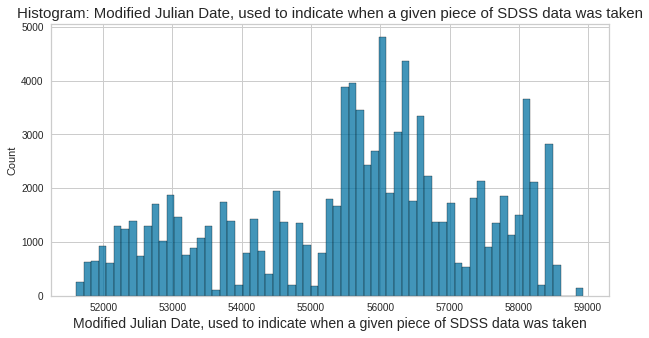

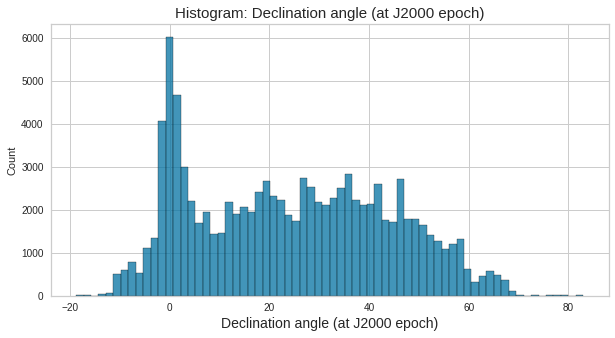

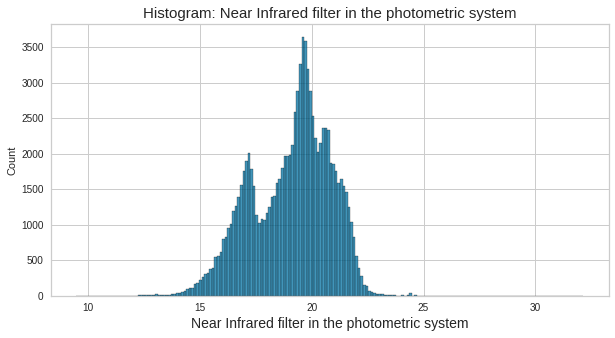

In [11]:
featureSet = ["r","redshift","u","g","alpha","plate","z","MJD","delta","i"]

labelSet = ["Red filter in the photometric system",
            "redshift value based on the increase in wavelength",
            "Ultraviolet filter in the photometric system",
            "Green filter in the photometric system",
            "Right Ascension angle (at J2000 epoch)",
            "plate ID, identifies each plate in SDSS",
            "Infrared filter in the photometric system",
            "Modified Julian Date, used to indicate when a given piece of SDSS data was taken",
            "Declination angle (at J2000 epoch)",
            "Near Infrared filter in the photometric system"]

for feature,label in zip(featureSet,labelSet):
  
  fig = plt.figure(figsize=(10,5))
  sns.histplot(df[feature])
  plt.title("Histogram: " + label ,fontsize=15)
  plt.xlabel(label,fontsize=14)
  plt.show()

## Feature selection

Dropping non-spectral features.

In [12]:
#dropping features that do not represent astronomical quantities.
features_to_drop = ["obj_ID","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","fiber_ID"]
df.drop(features_to_drop,axis=1,inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123,6121,56187


In [ ]:
df.shape

(100000, 11)

## Model Development

Spltting data for training and testing using stratification.

In [13]:
#Splitting data into training and testing
X = df.drop(["class"],axis=1)
y = df["class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=5,stratify=y)

Training models that do not require scaling below.

In [14]:
#models that do not require scaling
ml_models_1 = {
    
              "Gaussian Naive Bayes" :GaussianNB(),
              "Decision Tree" : DecisionTreeClassifier(random_state=5),
              "Random Forest" : RandomForestClassifier(random_state=5)
            
            }
#training models and printing accuracy
for model_name,model in ml_models_1.items():
  
  model = model.fit(X_train,y_train)
  print("Trained " +model_name+" classifier.")

Trained Gaussian Naive Bayes classifier.
Trained Decision Tree classifier.
Trained Random Forest classifier.


Fitting scaler on training set.

In [15]:
#Fitting scaler to train data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Training models that require scaling below.

In [16]:
#models that require scaling
ml_models_2 = {      
              "Logistic Regression" : LogisticRegression(max_iter=1000),       
              "Support Vector Machine" : SVC(),
              "K Nearest Neighbor" :KNeighborsClassifier()
            }

#training models and printing accuracy
for model_name,model in ml_models_2.items():
  
  model = model.fit(scaler.transform(X_train),y_train)
  print("Trained " +model_name+" classifier.")

Trained Logistic Regression classifier.
Trained Support Vector Machine classifier.
Trained K Nearest Neighbor classifier.


##Model Evaluation

Generating Classification report for getting recall, precision and F1 score for each model.



> Non-distance based algorithms.



In [ ]:
#training models and printing classification report
for model_name,model in ml_models_1.items():
  
  print("\nClassification report of " +model_name+" :\n")
  print(classification_report(y_test,model.predict(X_test)))



Classification report of Gaussian Naive Bayes :

              precision    recall  f1-score   support

           0       0.71      0.87      0.79     29722
           1       0.63      0.87      0.73      9481
           2       0.48      0.02      0.04     10797

    accuracy                           0.69     50000
   macro avg       0.61      0.59      0.52     50000
weighted avg       0.65      0.69      0.61     50000


Classification report of Decision Tree :

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29722
           1       0.91      0.91      0.91      9481
           2       1.00      0.99      1.00     10797

    accuracy                           0.96     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg       0.96      0.96      0.96     50000


Classification report of Random Forest :

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    



> Distance based algorithms.




In [ ]:
#training models and printing classification report
for model_name,model in ml_models_2.items():
  
  print("\nClassification report of " +model_name+" :\n")
  print(classification_report(y_test,model.predict(scaler.transform(X_test))))


Classification report of Logistic Regression :

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     29722
           1       0.95      0.87      0.91      9481
           2       0.94      1.00      0.97     10797

    accuracy                           0.95     50000
   macro avg       0.95      0.94      0.95     50000
weighted avg       0.95      0.95      0.95     50000


Classification report of Support Vector Machine :

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     29722
           1       0.97      0.89      0.93      9481
           2       0.94      0.99      0.96     10797

    accuracy                           0.96     50000
   macro avg       0.96      0.95      0.95     50000
weighted avg       0.96      0.96      0.96     50000


Classification report of K Nearest Neighbor :

              precision    recall  f1-score   support

           0       0.94      0.97 


Generating ROC-AUC curves for visualizing class seperability (to see how good classifiers are at distinguishing between classes). 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


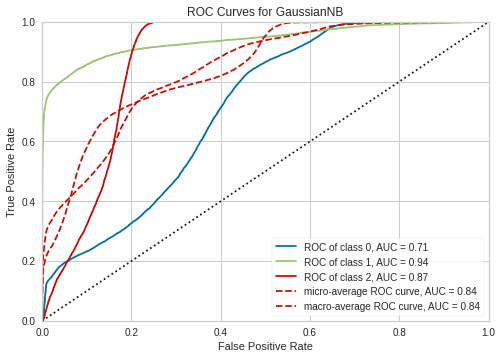

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


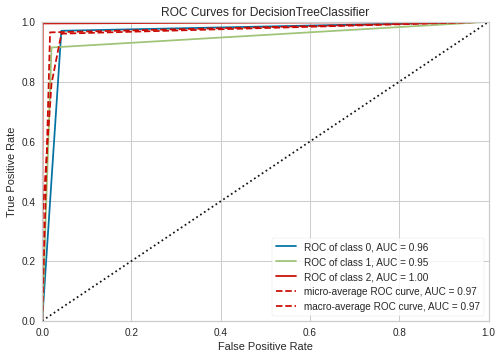

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


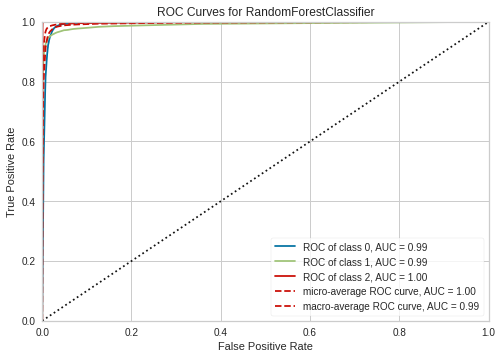

In [ ]:
for model_name,model in ml_models_1.items():
  visualizer = ROCAUC(model, classes=["0", "1", "2"])
  # Fit the training data to the visualizer
  visualizer.fit(X_train, y_train)  
  # Evaluate the model on the test data      
  visualizer.score(X_test, y_test)      
  # Finalize and render the figure  
  visualizer.show()                      

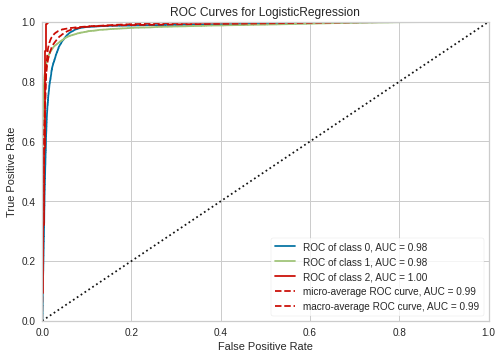

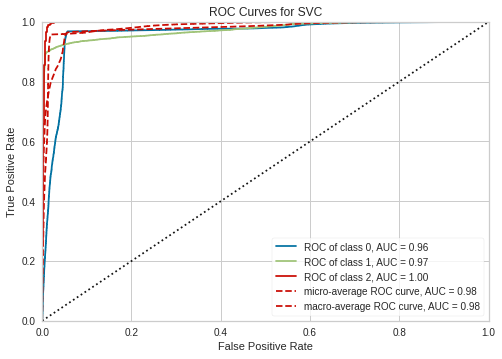

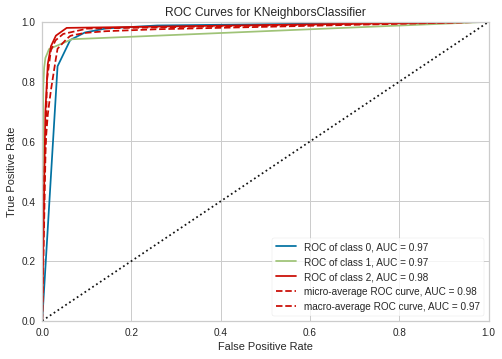

In [ ]:
for model_name,model in ml_models_2.items():
  visualizer = ROCAUC(model, classes=["0", "1", "2"])
  # Fit the training data to the visualizer
  visualizer.fit(scaler.transform(X_train), y_train) 
  # Evaluate the model on the test data       
  visualizer.score(scaler.transform(X_test), y_test)   
  # Finalize and render the figure     
  visualizer.show()                                         